In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv 
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

load_dotenv()

# Import the SentimentIntensityAnalyzer class from the nltk.sentiment module. 
# This class is used for sentiment analysis of text data.
from nltk.sentiment import SentimentIntensityAnalyzer

file_path = os.getenv('FILE_PATH')  

df = pd.read_csv(file_path)
df.head()

,__typename,advice,cons,countHelpful,employer,employerResponses,featured,hasEmployerResponse,isCurrentJob,jobTitle,...,ratingCompensationAndBenefits,ratingCultureAndValues,ratingDiversityAndInclusion,ratingOverall,ratingRecommendToFriend,ratingSeniorLeadership,ratingWorkLifeBalance,reviewDateTime,reviewId,summary
0,EmployerReviewRG,NaN,But bad person have the power,0,"{'id': 7530, 'shortName': 'Garuda Indonesia', ...",[],False,False,True,NaN,...,2.0,2,0,3,NEGATIVE,2.0,3.0,2019-01-09T03:59:37.563,24122987,Not that good
1,EmployerReviewRG,Less corruption,Ok but office to far,0,"{'id': 7530, 'shortName': 'Garuda Indonesia', ...",[],False,False,True,{'text': 'Staff Software Engineer'},...,4.0,4,3,5,POSITIVE,3.0,4.0,2024-12-25T01:47:58.550,93887380,Garuda as national treasure
2,EmployerReviewRG,NaN,Change of management \nunfinished business and...,0,"{'id': 7530, 'shortName': 'Garuda Indonesia', ...",[],False,False,False,{'text': 'Cargo Sales Manager'},...,4.0,3,3,4,NEGATIVE,3.0,4.0,2024-11-12T20:11:11.030,92794308,Working in a state owned airline
3,EmployerReviewRG,NaN,Indonesian speaking. Sometimes no foreign. Low...,0,"{'id': 7530, 'shortName': 'Garuda Indonesia', ...",[],False,False,False,{'text': 'Airline Pilot'},...,1.0,1,1,1,NEGATIVE,1.0,0.0,2024-11-10T19:30:02.127,92718667,Very good
4,EmployerReviewRG,NaN,Heavy workload and insufficient number of huma...,0,"{'id': 7530, 'shortName': 'Garuda Indonesia', ...",[],False,False,False,{'text': 'Manager'},...,0.0,0,0,5,NaN,0.0,0.0,2024-10-08T20:00:29.793,91750683,Manager in Garuda Indonesia


In [2]:
# Select the 'summary' column
reviews = df['summary']

# Drop rows with missing 'summary'
reviews = reviews.dropna()

# Remove rows with less than 5 words
reviews = reviews[reviews.apply(lambda x: len(x.split()) >= 3)]

# Convert Series to DataFrame
reviews = reviews.to_frame() 
reviews['num_words'] = reviews['summary'].apply(lambda x: len(x.split()))

# Sample 10% of the data
reviews_sampled = reviews.sample(frac=0.1, replace=False, random_state=42)

# Print the sampled DataFrame
print(reviews_sampled.head())

                                             summary  num_words
69                  delivering the training material          4
122  Good for travellers, bad for career path seeker          8
116              Big Company in the middle of Crisis          7
95   Best place if you like traveling, but that's it          9
88                          The Airline of Indonesia          4


In [3]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

def calculate_sentiment(reviews):
    # Drop rows with missing 'summary'
    reviews = reviews.dropna(subset=['summary'])
    reviews['summary'] = reviews['summary'].astype(str)

    # Initialize SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    # Calculate sentiment score for each review
    reviews['sentiment_score'] = reviews['summary'].apply(lambda x: sia.polarity_scores(x)['compound'])

    # Assign sentiment label based on sentiment score
    reviews['sentiment_label'] = reviews['sentiment_score'].apply(
        lambda x: 'Positive' if x >= 0.2 else 'Negative' if x <= -0.2 else 'Neutral'
    )

    # Count the number of positive, negative, and neutral reviews
    sentiment_counts = reviews['sentiment_label'].value_counts()

    # Add the sentiment count as a new column
    reviews['sentiment_count'] = reviews['sentiment_label'].map(sentiment_counts)

    # Print the sentiment counts
    for sentiment, count in sentiment_counts.items():
        print(f"{sentiment}: {count} reviews")

    return reviews

reviews = calculate_sentiment(reviews)
reviews.head()

Neutral: 48 reviews
Positive: 44 reviews
Negative: 10 reviews


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,summary,num_words,sentiment_score,sentiment_label,sentiment_count
0,Not that good,3,-0.3412,Negative,10
1,Garuda as national treasure,4,0.2960,Positive,44
2,Working in a state owned airline,6,0.0000,Neutral,48
4,Manager in Garuda Indonesia,4,0.0000,Neutral,48
5,Cunning and Dishonesty,3,0.0000,Neutral,48


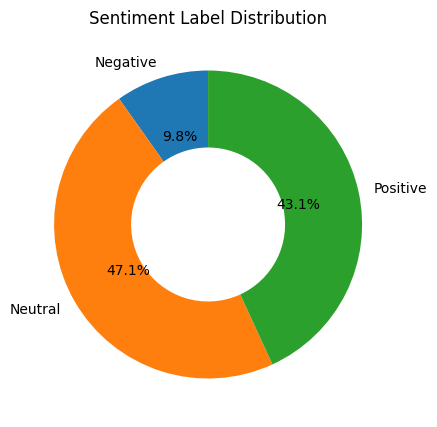

In [4]:
# Group the data by sentiment label
sentiment_grouped = reviews.groupby('sentiment_label').agg({'summary': 'count', 'num_words': 'mean', 'sentiment_score': 'mean'}).reset_index()

sentiment_grouped.head()

# Create a pie chart
fig, ax = plt.subplots(figsize=(5, 5)) 
ax.pie(sentiment_grouped['summary'], labels=sentiment_grouped['sentiment_label'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5))

# Display the plot
ax.set_title('Sentiment Label Distribution')
plt.show()

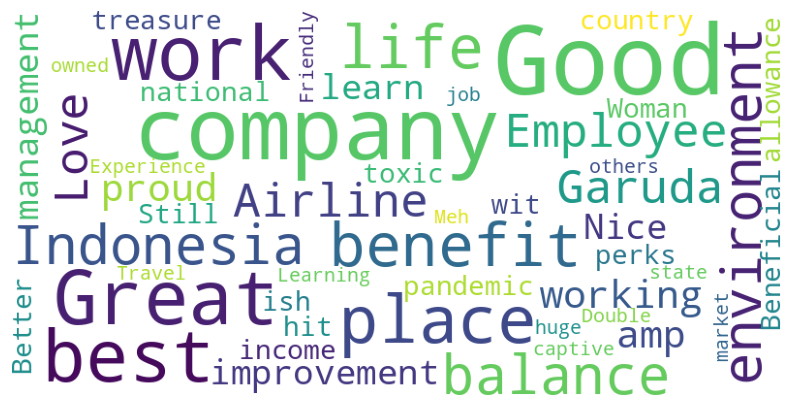

In [5]:
positive_reviews = reviews[reviews['sentiment_label'] == 'Positive']

# Sample size
reviews_sample = reviews.sample(frac = 0.1, replace = False, random_state=42)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 50,
        max_font_size = 50,
        scale = 2,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 20))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
# Show wordcloud
show_wordcloud(positive_reviews["summary"])


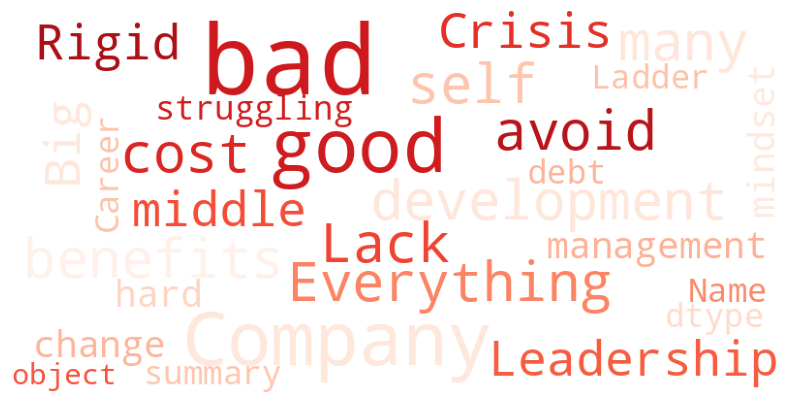

In [6]:
negative_reviews = reviews[reviews['sentiment_label'] == 'Negative']

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color = 'white',
        colormap = 'Reds',
        max_words = 50,
        max_font_size = 50,
        scale = 2,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 20))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(negative_reviews["summary"])